# <font color='blue'>Avaliando modelos com diversas estruturas</font>

## Montando DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

drive_dados = '/content/drive/MyDrive/RedesNeurais/Classificacao/'

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

drive_dados = '/content/drive/MyDrive/UFSB/Componentes_curriculares/RNA/_01_Classificacao/' # Colocar uma barra no final do endereço

## 1) Importando bibliotecas

Importar as bibliotecas e o arquivo que serão utilizadas durante as análises. 

In [ ]:
# Imports bilbliotecas básica
# ===========================
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.display import display, Image
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
import graphviz

# Imports bilbliotecas com funções importantes
# ============================================
from sklearn import metrics # Calcula "Confusion Matrix" para o modelo
from sklearn.tree import export_graphviz # Exporta grafo para visualização

# modelos utilzados para classificação
# ====================================
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB # modelo Nayve Bayes com distribuição Gausiana
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC

# 2) Lendo os dados

In [ ]:
import pickle
# Lendo os dados de treinamento 
train_inputs, train_targets = pickle.load(open(drive_dados + 'dados_treinamento.sav', 'rb'))

# Lendo os dados de teste
test_inputs, test_targets = pickle.load(open(drive_dados + 'dados_teste.sav', 'rb')) # Final_dados_teste_Combine # Final_dados_teste_bruto
train_inputs

,sex,age,Number_of_Warts,Type,Area,induration_diameter
48,-0.555556,0.483288,-0.243484,0.135802,-0.040978,-0.169572
19,0.444444,0.434508,-0.132373,0.135802,-0.162447,-0.081336
70,0.444444,-0.394761,0.312071,-0.364198,-0.066402,-0.110748
42,-0.555556,-0.199639,-0.243484,-0.364198,-0.080526,-0.110748
54,0.444444,-0.297200,-0.076818,0.135802,-0.057927,-0.125454
...,...,...,...,...,...,...
49,0.444444,0.385727,0.423182,0.135802,-0.012729,0.521605
52,-0.555556,-0.297200,-0.021262,-0.364198,-0.111599,-0.110748
62,0.444444,0.044264,-0.076818,-0.364198,-0.024029,0.153958
45,0.444444,0.532069,-0.021262,-0.364198,0.026819,-0.110748


In [ ]:
train_targets

,label
48,1
19,1
70,1
42,1
54,1
...,...
49,1
52,1
62,1
45,1


## 3) Treinando e verificando a exatidão dos modelos
### <font color='blue'> 3.1) Logistic Regression

In [ ]:
# Construindo o modelo Classificador
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
model_LR = LogisticRegression(
    penalty='l2', # {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
    dual=False, 
    tol=0.0001, 
    C=1.0, 
    fit_intercept=True, 
    intercept_scaling=1, 
    class_weight=None, 
    random_state=None, 
    solver='lbfgs', # {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
    max_iter=int(1e4), 
    multi_class='auto', 
    verbose=0, 
    warm_start=False, 
    n_jobs=None, 
    l1_ratio=None # float, default=None
)

# Apresentando os dados ao modelo
model_LR.fit(train_inputs, np.ravel(train_targets))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### 3.1.1) Metricas para conjunto de treinamento

In [ ]:
# Métricas conjunto de treinamento
valores = train_targets.drop_duplicates().sort_values(by=[train_targets.columns[0]]).values
target_names = [np.array2string(elemento[0]) for elemento in valores]
entrada = train_inputs
prev_trein_LR = [np.where(elemento == max(elemento))[0][0] for elemento in model_LR.predict_proba(entrada)]
print(metrics.classification_report(train_targets, prev_trein_LR, target_names = target_names, zero_division=0))
# Confusion Matrix
print('Confusion Matrix:')
print('==================')
np.set_printoptions(linewidth=np.inf)
metrics.confusion_matrix(train_targets, prev_trein_LR)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.79      1.00      0.88        49

    accuracy                           0.79        62
   macro avg       0.40      0.50      0.44        62
weighted avg       0.62      0.79      0.70        62

Confusion Matrix:


array([[ 0, 13],
       [ 0, 49]])

#### 3.1.2) Metricas para conjunto de teste

In [ ]:
# Métricas conjunto de teste
valores = test_targets.drop_duplicates().sort_values(by=[test_targets.columns[0]]).values
target_names = [np.array2string(elemento[0]) for elemento in valores]
entrada = test_inputs
prev_test_LR = [np.where(elemento == max(elemento))[0][0]for elemento in model_LR.predict_proba(entrada)]
print(metrics.classification_report(test_targets, prev_test_LR, target_names = target_names, zero_division=0))
# Confusion Matrix
print('Confusion Matrix:')
print('==================')
np.set_printoptions(linewidth=np.inf)
metrics.confusion_matrix(test_targets, prev_test_LR)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.74      1.00      0.85        14

    accuracy                           0.74        19
   macro avg       0.37      0.50      0.42        19
weighted avg       0.54      0.74      0.63        19

Confusion Matrix:


array([[ 0,  5],
       [ 0, 14]])

### <font color='blue'>3.2) Classificador Multinomial Naive Bayes - Scikit-Learn

In [ ]:
# Criando o modelo Multinomial
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html?highlight=gaussiannb#sklearn.naive_bayes.GaussianNB
model_clf = GaussianNB().fit(train_inputs, np.ravel(train_targets))

#### 3.2.1) Metricas para conjunto de treinamento

In [ ]:
# Métricas conjunto de treinamento
valores = train_targets.drop_duplicates().sort_values(by=[train_targets.columns[0]]).values
target_names = [np.array2string(elemento[0]) for elemento in valores]
entrada = train_inputs
prev_trein_clf = [np.where(elemento == max(elemento))[0][0] for elemento in model_clf.predict_proba(entrada)]
print(metrics.classification_report(train_targets, prev_trein_clf, target_names = target_names, zero_division=0))
# Confusion Matrix
print('Confusion Matrix:')
print('==================')
np.set_printoptions(linewidth=np.inf)
metrics.confusion_matrix(train_targets, prev_trein_clf)

              precision    recall  f1-score   support

           0       0.20      0.08      0.11        13
           1       0.79      0.92      0.85        49

    accuracy                           0.74        62
   macro avg       0.49      0.50      0.48        62
weighted avg       0.67      0.74      0.69        62

Confusion Matrix:


array([[ 1, 12],
       [ 4, 45]])

#### 3.2.1) Metricas para conjunto de teste

In [ ]:
# Métricas conjunto de teste
valores = test_targets.drop_duplicates().sort_values(by=[test_targets.columns[0]]).values
target_names = [np.array2string(elemento[0]) for elemento in valores]
entrada = test_inputs
prev_test_clf = [np.where(elemento == max(elemento))[0][0]for elemento in model_clf.predict_proba(entrada)]
print(metrics.classification_report(test_targets, prev_test_clf, target_names = target_names, zero_division=0))
# Confusion Matrix
print('Confusion Matrix:')
print('==================')
np.set_printoptions(linewidth=np.inf)
metrics.confusion_matrix(test_targets, prev_test_clf)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.74      1.00      0.85        14

    accuracy                           0.74        19
   macro avg       0.37      0.50      0.42        19
weighted avg       0.54      0.74      0.63        19

Confusion Matrix:


array([[ 0,  5],
       [ 0, 14]])

### <font color='blue'> 3.3) Classificador KNN - Scikit-Learn

In [ ]:
# Construindo o modelo Classificador
# # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Range de valores de k que iremos testar
kVals = range(1, 40, 1)

# Lista vazia para receber as acurácias
acuracias = []

# Loop em todos os valores de k para testar cada um deles
for k in kVals:
    # Treinando o modelo KNN com cada valor de k
    model_knn = KNeighborsClassifier(n_neighbors = k)
    model_knn.fit(train_inputs, np.ravel(train_targets))
          
    # Avaliando o modelo e atualizando a lista de acurácias
    score = model_knn.score(test_inputs, np.ravel(test_targets))
    print("Com valor de k = %d, a acurácia é = %.2f%%" % (k, score * 100))
    acuracias.append(score)

# Obtendo o valor de k que apresentou a maior acurácia
i = np.argmax(acuracias)
print("O valor de k = %d alcançou a mais alta acurácia de %.2f%% nos dados de validação!" % (kVals[i], 
                                                                                             acuracias[i] * 100))

# Apresentando os dados ao modelo
model_knn = KNeighborsClassifier(n_neighbors = kVals[i])
model_knn.fit(train_inputs, np.ravel(train_targets))

Com valor de k = 1, a acurácia é = 47.37%
Com valor de k = 2, a acurácia é = 47.37%
Com valor de k = 3, a acurácia é = 52.63%
Com valor de k = 4, a acurácia é = 52.63%
Com valor de k = 5, a acurácia é = 47.37%
Com valor de k = 6, a acurácia é = 47.37%
Com valor de k = 7, a acurácia é = 52.63%
Com valor de k = 8, a acurácia é = 47.37%
Com valor de k = 9, a acurácia é = 57.89%
Com valor de k = 10, a acurácia é = 47.37%
Com valor de k = 11, a acurácia é = 73.68%
Com valor de k = 12, a acurácia é = 63.16%
Com valor de k = 13, a acurácia é = 73.68%
Com valor de k = 14, a acurácia é = 73.68%
Com valor de k = 15, a acurácia é = 73.68%
Com valor de k = 16, a acurácia é = 73.68%
Com valor de k = 17, a acurácia é = 73.68%
Com valor de k = 18, a acurácia é = 73.68%
Com valor de k = 19, a acurácia é = 73.68%
Com valor de k = 20, a acurácia é = 73.68%
Com valor de k = 21, a acurácia é = 73.68%
Com valor de k = 22, a acurácia é = 73.68%
Com valor de k = 23, a acurácia é = 73.68%
Com valor de k = 24,

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

#### 3.3.1) Metricas para conjunto de treinamento

In [ ]:
# Métricas conjunto de treinamento
valores = train_targets.drop_duplicates().sort_values(by=[train_targets.columns[0]]).values
target_names = [np.array2string(elemento[0]) for elemento in valores]
entrada = train_inputs
prev_trein_knn = [np.where(elemento == max(elemento))[0][0] for elemento in model_knn.predict_proba(entrada)]
print(metrics.classification_report(train_targets, prev_trein_knn, target_names = target_names, zero_division=0))
# Confusion Matrix
print('Confusion Matrix:')
print('==================')
np.set_printoptions(linewidth=np.inf)
metrics.confusion_matrix(train_targets, prev_trein_knn)

              precision    recall  f1-score   support

           0       1.00      0.08      0.14        13
           1       0.80      1.00      0.89        49

    accuracy                           0.81        62
   macro avg       0.90      0.54      0.52        62
weighted avg       0.84      0.81      0.73        62

Confusion Matrix:


array([[ 1, 12],
       [ 0, 49]])

#### 3.3.2) Metricas para conjunto de teste

In [ ]:
# Métricas conjunto de teste
valores = test_targets.drop_duplicates().sort_values(by=[test_targets.columns[0]]).values
target_names = [np.array2string(elemento[0]) for elemento in valores]
entrada = test_inputs
prev_test_knn = [np.where(elemento == max(elemento))[0][0]for elemento in model_knn.predict_proba(entrada)]
print(metrics.classification_report(test_targets, prev_test_knn, target_names = target_names, zero_division=0))
# Confusion Matrix
print('Confusion Matrix:')
print('==================')
np.set_printoptions(linewidth=np.inf)
metrics.confusion_matrix(test_targets, prev_test_knn)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.74      1.00      0.85        14

    accuracy                           0.74        19
   macro avg       0.37      0.50      0.42        19
weighted avg       0.54      0.74      0.63        19

Confusion Matrix:


array([[ 0,  5],
       [ 0, 14]])

### <font color='blue'>3.4) Decision Tree Classifier

In [ ]:
# Construindo o modelo Classificador
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
model_DTC = DecisionTreeClassifier(
    criterion='gini', # {“gini”, “entropy”}, default=”gini”
    splitter='best', # {“best”, “random”}, default=”best”
    max_depth=None, # int, default=None
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None, # int, float or {“auto”, “sqrt”, “log2”}, default=None
    random_state=None, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    min_impurity_split=None, 
    class_weight=None, 
    #presort='deprecated', 
    ccp_alpha=0.0
)

# Apresentando os dados ao modelo
model_DTC.fit(train_inputs, train_targets)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Definindo o nome do arquivo com a árvore de decisão
arquivo = 'model_DTC.dot'
labels = train_inputs.columns

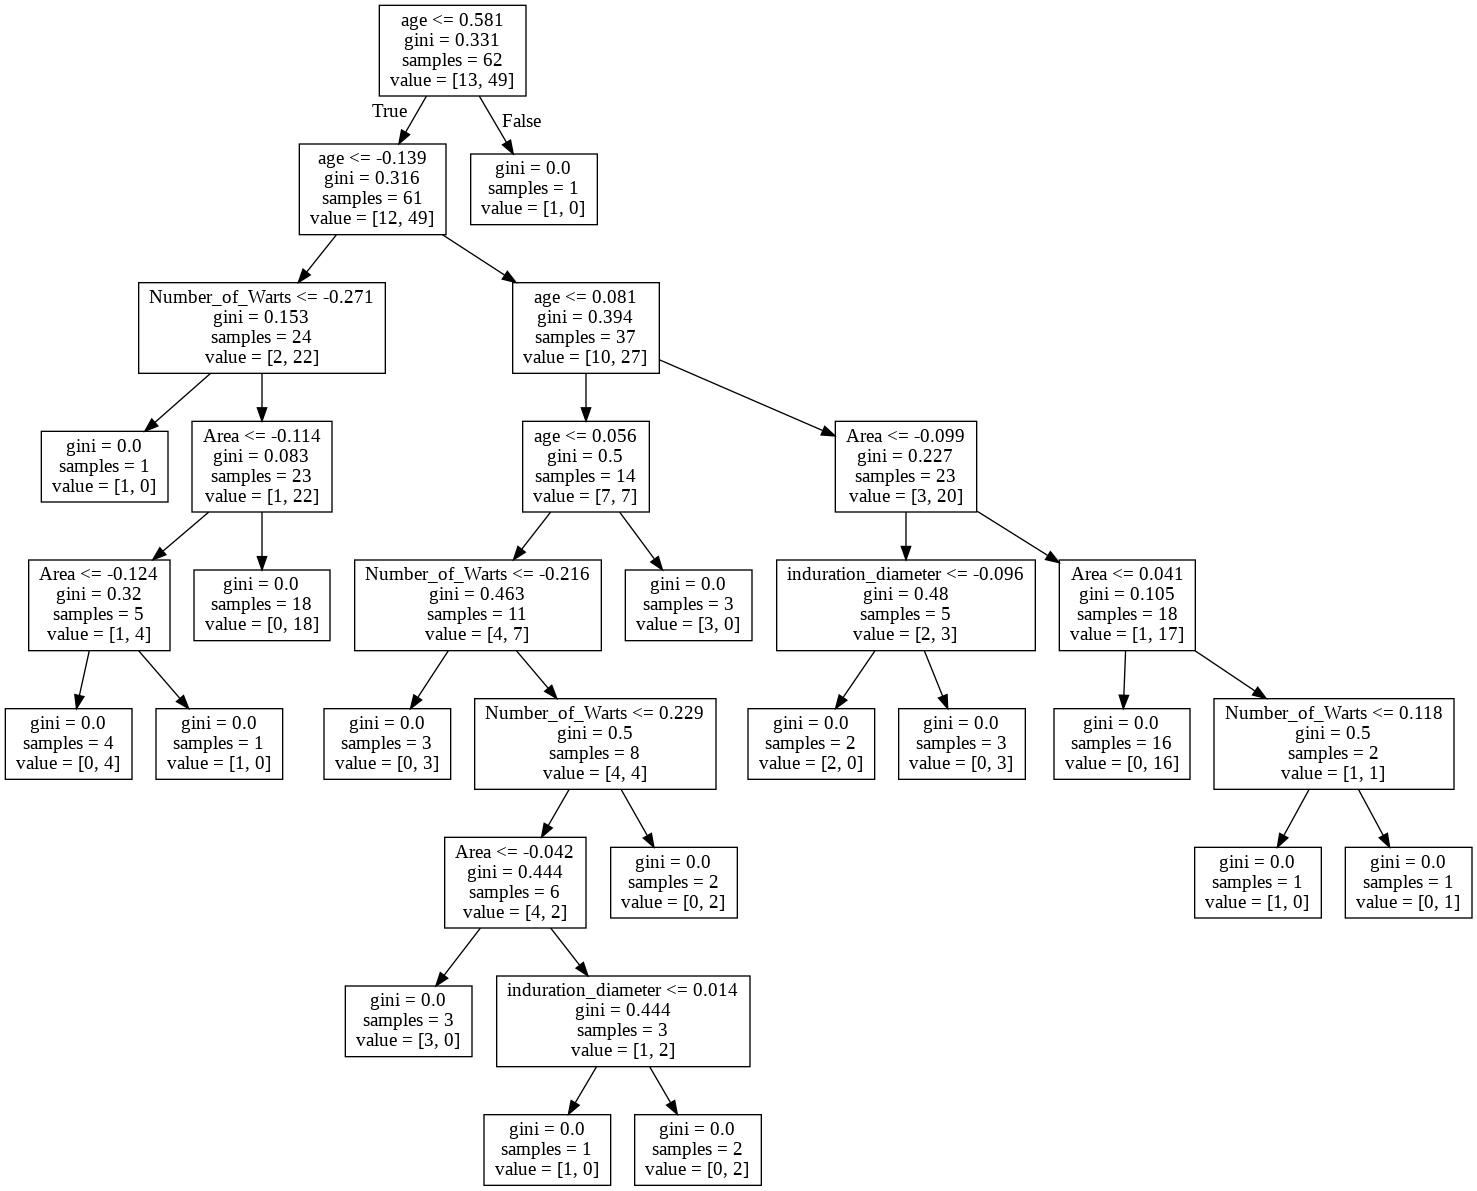

In [ ]:
# Gerando o gráfico da árvore de decisão
export_graphviz(model_DTC, out_file = arquivo, feature_names = labels)
with open(arquivo) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
# Converte aquivo para png
!dot -Tpng model_DTC.dot -o model_DTC.png
display(Image(filename='model_DTC.png'))

#### 3.4.1) Metricas para conjunto de treinamento

In [ ]:
# Métricas conjunto de treinamento
valores = train_targets.drop_duplicates().sort_values(by=[train_targets.columns[0]]).values
target_names = [np.array2string(elemento[0]) for elemento in valores]
entrada = train_inputs
prev_trein_DTC = [np.where(elemento == max(elemento))[0][0] for elemento in model_DTC.predict_proba(entrada)]
print(metrics.classification_report(train_targets, prev_trein_DTC, target_names = target_names, zero_division=0))
# Confusion Matrix
print('Confusion Matrix:')
print('==================')
np.set_printoptions(linewidth=np.inf)
metrics.confusion_matrix(train_targets, prev_trein_DTC)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        49

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62

Confusion Matrix:


array([[13,  0],
       [ 0, 49]])

#### 3.4.2) Metricas para conjunto de teste

In [ ]:
# Métricas conjunto de teste
entrada = test_inputs
valores = test_targets.drop_duplicates().sort_values(by=[test_targets.columns[0]]).values
target_names = [np.array2string(elemento[0]) for elemento in valores]
prev_test_DTC = [np.where(elemento == max(elemento))[0][0] for elemento in model_DTC.predict_proba(entrada)]
print(metrics.classification_report(test_targets, prev_test_DTC, target_names = target_names, zero_division=0))
# Confusion Matrix
print('Confusion Matrix:')
print('==================')
np.set_printoptions(linewidth=np.inf)
metrics.confusion_matrix(test_targets, prev_test_DTC)

              precision    recall  f1-score   support

           0       0.20      0.20      0.20         5
           1       0.71      0.71      0.71        14

    accuracy                           0.58        19
   macro avg       0.46      0.46      0.46        19
weighted avg       0.58      0.58      0.58        19

Confusion Matrix:


array([[ 1,  4],
       [ 4, 10]])

### <font color='blue'> 3.5) Gaussian Process Classifier

In [ ]:
# Construindo o modelo Classificador
# https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessClassifier.html?highlight=gaussianprocessclassifier#sklearn.gaussian_process.GaussianProcessClassifier
kernel = 1.0 * RBF(1.0)
model_GPC = GaussianProcessClassifier(kernel=None,  
    optimizer='fmin_l_bfgs_b', 
    n_restarts_optimizer=0, 
    max_iter_predict=100, 
    warm_start=False, 
    copy_X_train=True, 
    random_state=None, 
    multi_class='one_vs_rest', 
    n_jobs=None)
# Apresentando os dados ao model
model_GPC.fit(train_inputs, np.ravel(train_targets))

GaussianProcessClassifier(copy_X_train=True, kernel=None, max_iter_predict=100,
                          multi_class='one_vs_rest', n_jobs=None,
                          n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
                          random_state=None, warm_start=False)

#### 3.5.1) Metricas para conjunto de treinamento

In [ ]:
# Métricas conjunto de treinamento
valores = train_targets.drop_duplicates().sort_values(by=[train_targets.columns[0]]).values
target_names = [np.array2string(elemento[0]) for elemento in valores]
entrada = train_inputs
prev_trein_GPC = [np.where(elemento == max(elemento))[0][0] for elemento in model_GPC.predict_proba(entrada)]
print(metrics.classification_report(train_targets, prev_trein_GPC, target_names = target_names, zero_division=0))
# Confusion Matrix
print('Confusion Matrix:')
print('==================')
np.set_printoptions(linewidth=np.inf)
metrics.confusion_matrix(train_targets, prev_trein_GPC)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.79      1.00      0.88        49

    accuracy                           0.79        62
   macro avg       0.40      0.50      0.44        62
weighted avg       0.62      0.79      0.70        62

Confusion Matrix:


array([[ 0, 13],
       [ 0, 49]])

#### 3.5.2) Metricas para conjunto de teste

In [ ]:
# Métricas conjunto de teste
valores = test_targets.drop_duplicates().sort_values(by=[test_targets.columns[0]]).values
target_names = [np.array2string(elemento[0]) for elemento in valores]
entrada = test_inputs
prev_test_GPC = [np.where(elemento == max(elemento))[0][0] for elemento in model_GPC.predict_proba(entrada)]
print(metrics.classification_report(test_targets, prev_test_GPC, target_names = target_names, zero_division=0))
# Confusion Matrix
print('Confusion Matrix:')
print('==================')
np.set_printoptions(linewidth=np.inf)
metrics.confusion_matrix(test_targets, prev_test_GPC)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.74      1.00      0.85        14

    accuracy                           0.74        19
   macro avg       0.37      0.50      0.42        19
weighted avg       0.54      0.74      0.63        19

Confusion Matrix:


array([[ 0,  5],
       [ 0, 14]])

### <font color='blue'>3.6) Support Vector Classification

In [ ]:
# Construindo o modelo Classificador
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
model_SVC = SVC(C=1.0, 
                kernel='rbf', 
                degree=3, 
                gamma='auto', 
                coef0=0.0, 
                shrinking=True, 
                probability=False, 
                tol=0.001, 
                cache_size=200, 
                class_weight=None, 
                verbose=False, 
                max_iter=-1, 
                decision_function_shape='ovr', 
                break_ties=False, 
                random_state=None)
# Apresentando os dados ao modelo
model_SVC.fit(train_inputs, np.ravel(train_targets))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### 3.6.1) Metricas para conjunto de treinamento

In [ ]:
# Métricas conjunto de treinamento
valores = train_targets.drop_duplicates().sort_values(by=[train_targets.columns[0]]).values
target_names = [np.array2string(elemento[0]) for elemento in valores]
entrada = train_inputs
prev_trein_SVC = [elemento for elemento in model_SVC.predict(entrada)]
print(metrics.classification_report(train_targets, prev_trein_SVC, target_names = target_names, zero_division=0))
# Confusion Matrix
print('Confusion Matrix:')
print('==================')
np.set_printoptions(linewidth=np.inf)
metrics.confusion_matrix(train_targets, prev_trein_SVC)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.79      1.00      0.88        49

    accuracy                           0.79        62
   macro avg       0.40      0.50      0.44        62
weighted avg       0.62      0.79      0.70        62

Confusion Matrix:


array([[ 0, 13],
       [ 0, 49]])

#### 3.6.2) Metricas para conjunto de teste

In [ ]:
# Métricas conjunto de teste
valores = test_targets.drop_duplicates().sort_values(by=[test_targets.columns[0]]).values
target_names = [np.array2string(elemento[0]) for elemento in valores]
entrada = test_inputs
prev_test_SVC = [elemento for elemento in model_SVC.predict(entrada)]
print(metrics.classification_report(test_targets, prev_test_SVC, target_names = target_names, zero_division=0))
# Confusion Matrix
print('Confusion Matrix:')
print('==================')
np.set_printoptions(linewidth=np.inf)
metrics.confusion_matrix(test_targets, prev_test_SVC)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.74      1.00      0.85        14

    accuracy                           0.74        19
   macro avg       0.37      0.50      0.42        19
weighted avg       0.54      0.74      0.63        19

Confusion Matrix:


array([[ 0,  5],
       [ 0, 14]])

### <font color='blue'>3.7) Multi-layer Perceptron Classifier

In [ ]:
# Construindo o modelo Classificador
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier
model_MPLC = MLPClassifier(
    hidden_layer_sizes=(1,), # tuple, length = n_layers - 2, default=(100,) The ith element represents the number of neurons in the ith hidden layer.
    activation='logistic', # {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’ Activation function for the hidden layer.
    solver='lbfgs', # {‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’ The solver for weight optimization.
    alpha=0.0001, # float, default=0.0001, L2 penalty (regularization term) parameter.
    batch_size='auto', 
    learning_rate='adaptive', # {‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’, Learning rate schedule for weight updates.
    learning_rate_init = 0.01,
    power_t=0.5,
    max_iter=int(2E10), # int, default=200, Maximum number of iterations. 
    shuffle=True,
    random_state=None, 
    tol=1e-10, # Erro desejado
    verbose=False, 
    warm_start=False, 
    momentum=0.9, 
    nesterovs_momentum=True, 
    early_stopping=False, 
    validation_fraction=0, # Fração separada para conjunto de validação
    beta_1=0.9, 
    beta_2=0.999, 
    epsilon=1e-08, 
    n_iter_no_change=10, 
    max_fun=15000
)
# Apresentando os dados ao model
model_MPLC.fit(train_inputs, np.ravel(train_targets))

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1,), learning_rate='adaptive',
              learning_rate_init=0.01, max_fun=15000, max_iter=20000000000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=1e-10, validation_fraction=0, verbose=False,
              warm_start=False)

#### 3.7.1) Metricas para conjunto de treinamento

In [ ]:
# Métricas conjunto de treinamento
valores = train_targets.drop_duplicates().sort_values(by=[train_targets.columns[0]]).values
target_names = [np.array2string(elemento[0]) for elemento in valores]
entrada = train_inputs
prev_trein_MPLC = [np.where(elemento == max(elemento))[0][0] for elemento in model_MPLC.predict_proba(entrada)]
print(metrics.classification_report(train_targets, prev_trein_MPLC, target_names = target_names, zero_division=0))
# Confusion Matrix
print('Confusion Matrix:')
print('==================')
np.set_printoptions(linewidth=np.inf)
metrics.confusion_matrix(train_targets, prev_trein_MPLC)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.79      1.00      0.88        49

    accuracy                           0.79        62
   macro avg       0.40      0.50      0.44        62
weighted avg       0.62      0.79      0.70        62

Confusion Matrix:


array([[ 0, 13],
       [ 0, 49]])

#### 3.7.2) Metricas para conjunto de teste

In [ ]:
# Métricas conjunto de teste
valores = test_targets.drop_duplicates().sort_values(by=[test_targets.columns[0]]).values
target_names = [np.array2string(elemento[0]) for elemento in valores]
entrada = test_inputs
prev_test_MPLC = [np.where(elemento == max(elemento))[0][0] for elemento in model_MPLC.predict_proba(entrada)]
print(metrics.classification_report(test_targets, prev_test_MPLC, target_names = target_names, zero_division=0))
# Confusion Matrix
print('Confusion Matrix:')
print('==================')
np.set_printoptions(linewidth=np.inf)
metrics.confusion_matrix(test_targets, prev_test_MPLC)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.74      1.00      0.85        14

    accuracy                           0.74        19
   macro avg       0.37      0.50      0.42        19
weighted avg       0.54      0.74      0.63        19

Confusion Matrix:


array([[ 0,  5],
       [ 0, 14]])

# Gravando o modelo

In [ ]:
import pickle
model = model_knn
# Gravando o modelo
pickle.dump((model, train_inputs, train_targets, test_inputs, test_targets) , open(drive_dados + 'model_reduzido_2_back.sav', 'wb'))